In [45]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# URL for JSON: https://unite-db.com/stats.json
# Convert to CSV: df.to_csv("uniteAggregate.csv", encoding='utf-8', index=False)

# Load data using Python JSON module
with open('data.json','r') as f:
    data = json.loads(f.read())

# Normalizing data
df = pd.json_normalize(data, record_path=["level"], meta=["name"])

# Create level column
df.insert(loc=0, column="lvl",
    value=np.tile([i for i in range(1,16)], 22))

# Convert sp_attack column to be of numeric type
df["sp_attack"] = pd.to_numeric(df["sp_attack"])

print("Aggregate data")
print(df.head())

# Group data by level
grouped = df.groupby(["lvl"])

# Show all level 1 stats for each pokemon
print("Grouped data")
print(grouped.get_group(1).head())

print(df.dtypes)

Aggregate data
   lvl    hp  attack  defense  sp_attack  sp_defense   name
0    1  3000     170       52         20          36  Absol
1    2  3107     186       59         23          41  Absol
2    3  3224     204       67         27          47  Absol
3    4  3353     223       76         31          53  Absol
4    5  3495     244       86         36          60  Absol
Grouped data
    lvl    hp  attack  defense  sp_attack  sp_defense       name
0     1  3000     170       52         20          36      Absol
15    1  3278     143       40         40          30    Blissey
30    1  3200     161       70         20          34  Charizard
45    1  3000     135       50         20          30  Cinderace
60    1  3292     134       60         50          40  Cramorant
lvl            int64
hp             int64
attack         int64
defense        int64
sp_attack      int64
sp_defense     int64
name          object
dtype: object


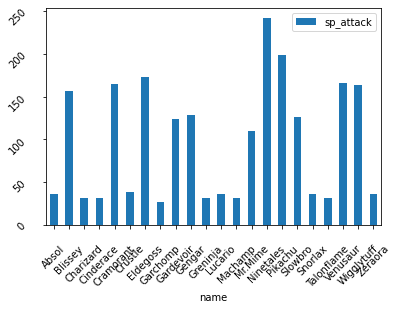

In [46]:
# Graph data
ax = grouped.get_group(5).plot.bar(x="name", y='sp_attack', rot=0)
ax.tick_params(labelrotation=45, pad=15) # Rotates X-Axis Ticks by 45-degrees
ax.tick_params()